# Simple Moving Average Crossover Strategy Demonstration
The code below will demonstrate the simple moving average crossover strategy, which will be integrated with genetic algoritm in "main.py".

For the example below, SMA-20 and SMA-200 will be implemented. 


In [309]:
# Import Packages
import numpy as np 
import pandas as pd
import datetime as dt
from pylab import  plt
plt.rcParams["font.family"] = "monospace"


In [310]:
# Import Data
raw = raw = pd.read_csv('./tr_eikon_eod_data.csv',
                              index_col=0, parse_dates=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [311]:
# Select the target and rename the closing price column
symbol = 'AAPL.O'
data = pd.DataFrame(raw[symbol].dropna())
data = data.rename({'AAPL.O': "Close"},axis='columns')
data

,Close
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827
...,...
2018-06-25,182.170000
2018-06-26,184.430000
2018-06-27,184.160000


In [312]:
## Set the SMA values for two different rolling window sizes
SMA1 = 20
SMA2 = 200

In [313]:
# Calculate 20-day and 200-day moving averages
data['SMA1'] = data['Close'].rolling(SMA1).mean()
data['SMA2'] = data['Close'].rolling(SMA2).mean()
data

,Close,SMA1,SMA2
Date,,,
2010-01-04,30.572827,NaN,NaN
2010-01-05,30.625684,NaN,NaN
2010-01-06,30.138541,NaN,NaN
2010-01-07,30.082827,NaN,NaN
2010-01-08,30.282827,NaN,NaN
...,...,...,...
2018-06-25,182.170000,189.2060,172.0353
2018-06-26,184.430000,189.0325,172.1643
2018-06-27,184.160000,188.8655,172.2776


<Axes: xlabel='Date'>

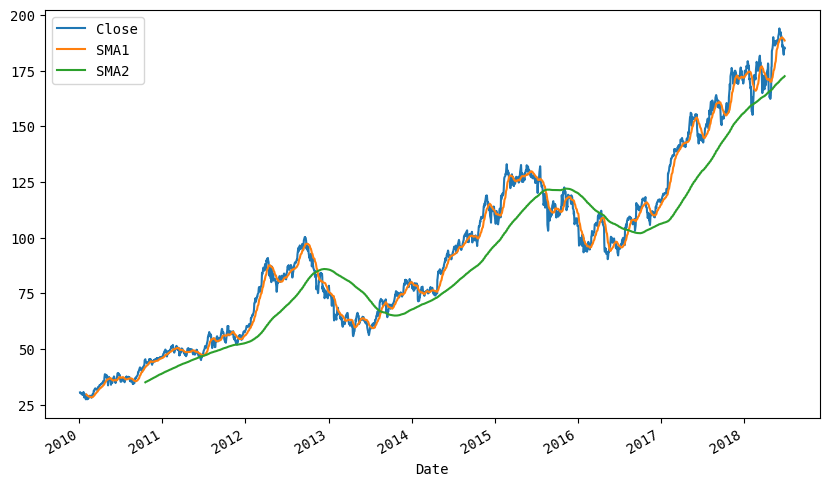

In [314]:
# Plot all the closing price and two moving averages
data.plot(figsize=(10,6))

In [315]:
# Generate trading signals based on moving average crossover
data['Signal'] = 0
data['Signal'][SMA1:] = data["SMA1"][SMA1:] > data['SMA2'][SMA1:]
data['Position'] = data['Signal'].diff()
data.head()

/var/folders/92/np1r9hr53xx495tm5px8pprh0000gn/T/ipykernel_90768/2099901279.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][SMA1:] = data["SMA1"][SMA1:] > data['SMA2'][SMA1:]
/var/folders/92/np1r9hr53xx495tm5px8pprh0000gn/

,Close,SMA1,SMA2,Signal,Position
Date,,,,,
2010-01-04,30.572827,NaN,NaN,0,NaN
2010-01-05,30.625684,NaN,NaN,0,0
2010-01-06,30.138541,NaN,NaN,0,0
2010-01-07,30.082827,NaN,NaN,0,0
2010-01-08,30.282827,NaN,NaN,0,0


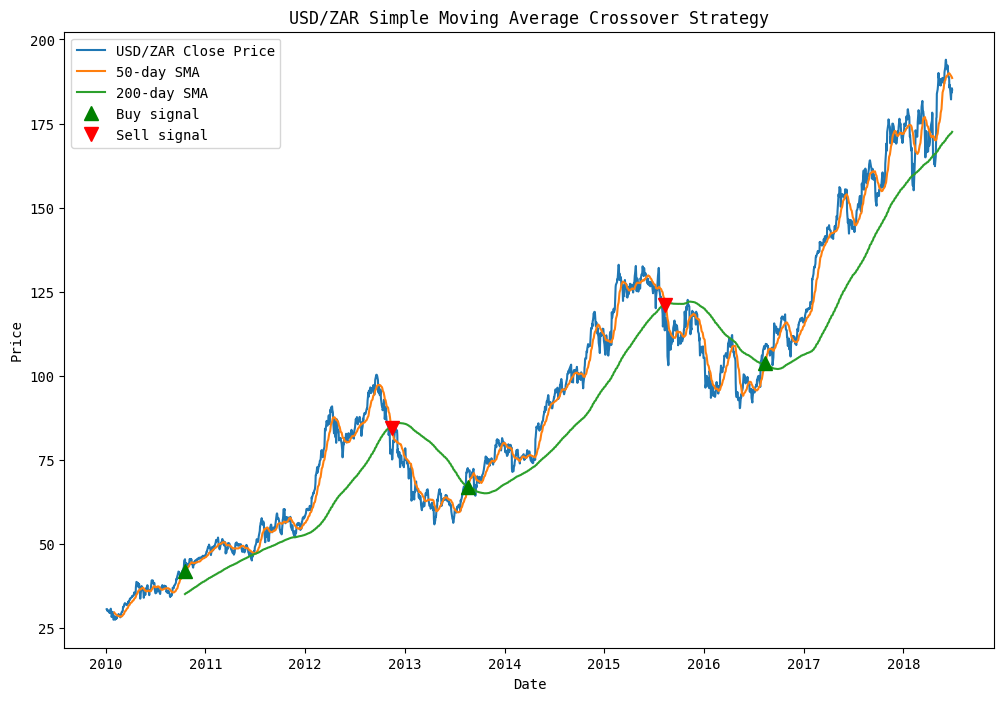

In [319]:
# Visualising the signals
plt.figure(figsize=(12, 8))
plt.plot(data['Close'], label='USD/ZAR Close Price')
plt.plot(data['SMA1'], label='50-day SMA')
plt.plot(data['SMA2'], label='200-day SMA')
plt.plot(data[data['Position'] == 1].index, data['SMA1'][data['Position'] == 1], '^', markersize=10, color='g', label='Buy signal')
plt.plot(data[data['Position'] == -1].index, data['SMA1'][data['Position'] == -1], 'v', markersize=10, color='r', label='Sell signal')
plt.title('USD/ZAR Simple Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [320]:
# Calculate daily returns of the USD/ZAR pair
data['Returns'] = data['Close'].pct_change()
# Calculate strategy returns
data['StrategyReturns'] = data['Returns'] * data['Position'].shift(1)
data.head()

,Close,SMA1,SMA2,Signal,Position,Returns,StrategyReturns
Date,,,,,,,
2010-01-04,30.572827,NaN,NaN,0,NaN,NaN,NaN
2010-01-05,30.625684,NaN,NaN,0,0,0.001729,NaN
2010-01-06,30.138541,NaN,NaN,0,0,-0.015906,-0.0
2010-01-07,30.082827,NaN,NaN,0,0,-0.001849,-0.0
2010-01-08,30.282827,NaN,NaN,0,0,0.006648,0.0


In [323]:
# Calculate cumulative returns for the strategy and buy-and-hold
data['CumulativeStrategyReturns'] = (1 + data['StrategyReturns']).cumprod() - 1
data['CumulativeBuyHoldReturns'] = (1 + data['Returns']).cumprod() - 1
data

,Close,SMA1,SMA2,Signal,Position,Returns,StrategyReturns,CumulativeStrategyReturns,CumulativeBuyHoldReturns
Date,,,,,,,,,
2010-01-04,30.572827,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,NaN,NaN,0,0,0.001729,NaN,NaN,0.001729
2010-01-06,30.138541,NaN,NaN,0,0,-0.015906,-0.0,0.0,-0.014205
2010-01-07,30.082827,NaN,NaN,0,0,-0.001849,-0.0,0.0,-0.016027
2010-01-08,30.282827,NaN,NaN,0,0,0.006648,0.0,0.0,-0.009486
...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,189.2060,172.0353,True,0,-0.014871,-0.0,0.001089,4.958559
2018-06-26,184.430000,189.0325,172.1643,True,0,0.012406,0.0,0.001089,5.032481
2018-06-27,184.160000,188.8655,172.2776,True,0,-0.001464,-0.0,0.001089,5.023650


# End
